In [1]:
from sklearn import cluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import geopandas as gpd
import re as reg

In [38]:
user='S'

if user=='S':
    mandat_dep=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/liste_mandat.csv")#on récupère le csv de la liste des mandats
    df_depu=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/listeDepute_complete.csv")
    #ddpartement=pd.read_csv("C:/Users/sylva/Desktop/git/Projet-Python-deputes/table_dpmt.csv")

if user=='G':
    mandat_dep=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/liste_mandatdef.csv") 
    df_depu=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/listeDepute_complete.csv")
    ddpartement=pd.read_csv("C:/Users/Administrateur.LAPTOP-FH8TB47B/Desktop/Projet_assemblee/table_dpmt.csv")

Essayons de faire un clustering sur les département selon leur orientation politique sous la troisième république

In [3]:
mandat_dep_3=mandat_dep[mandat_dep['Régime politique']=='Troisième République - Chambre des députés']
def datagroupe(mandat_reg) :
    liste_groupe=mandat_reg['Groupe'].unique()
    gros_groupe=[]
    for groupe in liste_groupe :
        if mandat_reg[mandat_reg['Groupe']==groupe]['Groupe'].count()>10 :
            gros_groupe+=[groupe]#on va se concentrer sur les gros groupes pour diminuer la complexité
    datadep=[]
    for departement in mandat_reg['Département'].unique():
        newdep=[]
        dep=mandat_reg[mandat_reg['Département']==departement]
        nbremand=dep['Groupe'].count()
        for groupe in gros_groupe :
            pct_groupe=dep[dep['Groupe']==groupe]['Groupe'].count()/nbremand#pourcentage de députés du département issu de ce groupe
            newdep+=[pct_groupe]#on rajoute les données du groupe dans le dataframe du département
        datadep+=[newdep]#on rajoute les données du département au futur dataframe général 
    datadep=np.array(datadep)#on crée un dataframe avec les informations
    depmt_groupe = pd.DataFrame(datadep, index=mandat_reg['Département'].unique(),columns=gros_groupe)
    return depmt_groupe, gros_groupe
(depmt_groupe_3, gros_groupe_3)=datagroupe(mandat_dep_3)
depmt_groupe_3

,Socialiste,Gauche indépendante,Fédération républicaine de France,Républicain radical et radical-socialiste,Non inscrit,Républicains indépendants et d'action sociale,Indépendants d'action populaire,Communiste,Indépendants de gauche,Gauche démocratique et radicale indépendante,...,Radical,Extreme-gauche,Appel au peuple,Centre gauche,Gauche,Union conservatrice,Opportuniste,Centre droit,Extrême-droite,Union des gauches
Deux-Sèvres,0.012346,0.000000,0.012346,0.098765,0.012346,0.012346,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.024691,0.012346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Finistère,0.013158,0.000000,0.013158,0.059211,0.039474,0.013158,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.059211,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000
Hautes-Alpes,0.020408,0.020408,0.000000,0.000000,0.081633,0.000000,0.000000,0.000000,0.000000,0.020408,...,0.000000,0.000000,0.000000,0.040816,0.000000,0.000000,0.040816,0.000000,0.000000,0.000000
Meurthe-et-Moselle,0.000000,0.000000,0.022222,0.011111,0.033333,0.011111,0.000000,0.000000,0.011111,0.011111,...,0.000000,0.000000,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Somme,0.016260,0.000000,0.000000,0.032520,0.032520,0.000000,0.000000,0.016260,0.000000,0.000000,...,0.000000,0.000000,0.016260,0.048780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Côtes-du-Nord,0.007092,0.000000,0.000000,0.070922,0.035461,0.014184,0.000000,0.000000,0.000000,0.007092,...,0.000000,0.000000,0.028369,0.063830,0.000000,0.014184,0.000000,0.000000,0.000000,0.000000
Alpes-Maritimes,0.000000,0.030303,0.000000,0.015152,0.121212,0.000000,0.000000,0.030303,0.060606,0.000000,...,0.000000,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.015152,0.000000,0.000000
Vendée,0.000000,0.000000,0.033333,0.022222,0.100000,0.011111,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.022222,0.044444,0.022222,0.000000,0.000000,0.000000,0.044444,0.000000
Haute-Marne,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Basses-Pyrénées,0.000000,0.029703,0.009901,0.019802,0.029703,0.000000,0.000000,0.000000,0.000000,0.019802,...,0.000000,0.000000,0.089109,0.069307,0.000000,0.019802,0.000000,0.000000,0.000000,0.000000


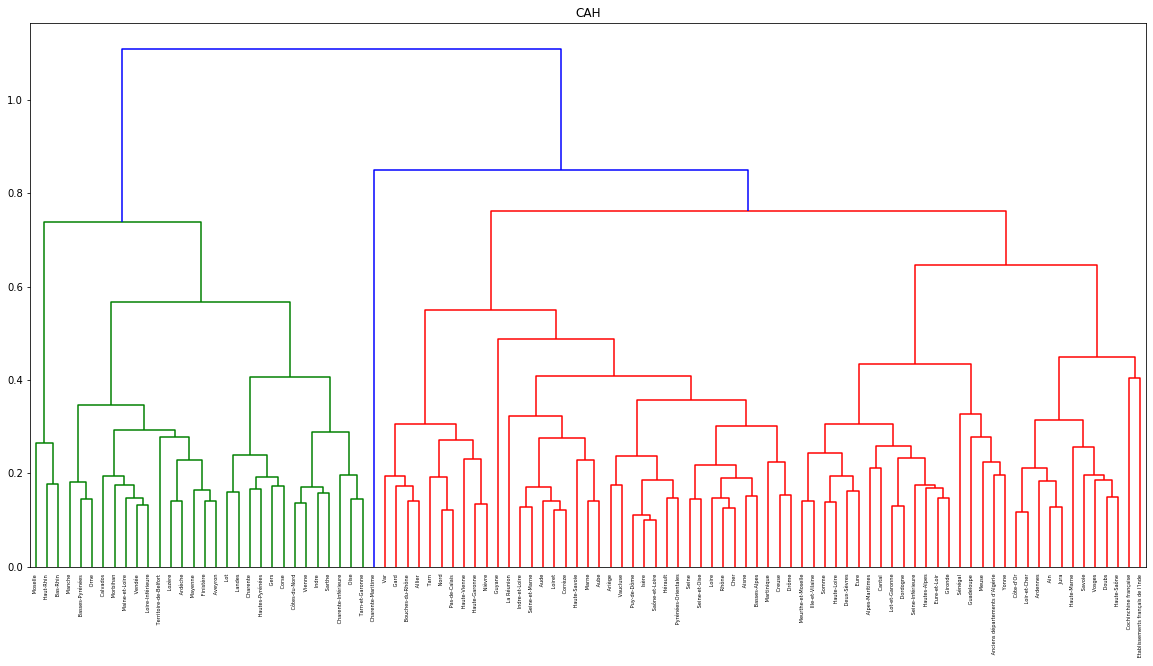

In [4]:
plt.figure(figsize=(20,10))
#générer la matrice des liens

Z = linkage(depmt_groupe_3,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=depmt_groupe_3.index)
plt.show()


In [5]:

kmeans = cluster.KMeans(n_clusters=2, max_iter=1000)#comme il y a beaucoup de variables et pas trop de données, on peut augmenter le nombre d'itérations.
def clustering(depmt_groupe):
    kmeans.fit(depmt_groupe)
    idk = np.argsort(kmeans.labels_)#on trie les index
    #affichage des observations et leurs groupes
    clusters=pd.DataFrame(kmeans.labels_[idk], depmt_groupe.index[idk], columns=['Appartenance'])
    depmt_app=depmt_groupe.merge(clusters, right_index=True, left_index=True)
    #distances aux centres de classes des observations
    dist_centre=kmeans.transform(depmt_groupe)
    print(dist_centre.mean())#les départements sont en moyenne plus proches d'un centre que de l'autre : bonne nouvelle ! Deux groupes relativement distincts a priori !
    return depmt_app
depmt_app_3=clustering(depmt_groupe_3)

0.2153585591153429


In [6]:
centres=pd.DataFrame(kmeans.cluster_centers_, index=['0','1'],columns=gros_groupe_3)
pd.set_option('display.max_columns', None)

display(centres)

,Socialiste,Gauche indépendante,Fédération républicaine de France,Républicain radical et radical-socialiste,Non inscrit,Républicains indépendants et d'action sociale,Indépendants d'action populaire,Communiste,Indépendants de gauche,Gauche démocratique et radicale indépendante,Gauche radicale,Alliance des républicains de gauche et des radicaux indépendants,Parti socialiste,Députés indépendants,Indépendants,Indépendants républicains,Union républicaine démocratique,Républicains de gauche,Union socialiste et républicaine,Fédération républicaine,Démocrate populaire,Députés du centre républicain,Parti socialiste de France,Radical et radical-socialiste,Parti républicain socialiste et socialiste français,Parti républicain socialiste,Parti socialiste français,Démocrates populaires,Républicain et social,Démocrates,Gauche républicaine démocratique,Action démocratique et sociale,Entente républicaine démocratique,Gauche sociale et radicale,Action républicaine et sociale,Républicain socialiste,Républicain socialiste et socialiste français,Union républicaine radicale et socialiste,Parti radical et radical socialiste,Gauche démocratique,Parti républicain radical et radical socialiste,Républicains radicaux-socialistes,Action libérale,Républicain progressiste,Gauche radicale-socialiste,Socialistes parlementaires,Droites,Socialistes unifiés,Union démocratique,Gauche démocratique,Républicains progressistes,Radical-socialiste,Progressiste,Union républicaine,Défense nationale,Républicains nationalistes,Républicain radical,Union des Droites,Républicain,Républicain,Extrême-gauche,Gauche républicaine,Radical,Extreme-gauche,Appel au peuple,Centre gauche,Gauche,Union conservatrice,Opportuniste,Centre droit,Extrême-droite,Union des gauches
0,0.027208,0.003919,0.001264,0.067219,0.018446,0.001935,5.204170e-18,0.008225,0.006597,0.004223,0.124150,0.004557,0.069025,0.003884,0.003647,0.000465,0.011434,0.020792,0.004777,0.003965,0.000735,0.002316,0.003835,0.022597,0.001850,0.001941,0.001742,0.000270,0.000905,0.000220,0.014184,0.002778,0.015303,0.002397,0.003545,0.020302,0.007355,0.003350,0.015544,0.014746,0.025385,0.022427,0.007051,0.007194,0.028775,0.014321,0.000409,0.005591,0.016510,0.014470,0.023298,0.031915,0.004756,0.095740,0.000517,0.002007,0.012764,0.010230,0.003254,0.004244,1.772030e-02,0.059442,3.081498e-03,2.191206e-03,0.006728,0.021381,0.001391,0.000000,0.003982,0.002371,0.000339,0.001912
1,0.008593,0.005353,0.010951,0.045831,0.035400,0.004076,1.026852e-02,0.005574,0.005563,0.004620,0.068684,0.005903,0.028846,0.011123,0.008559,0.001357,0.038231,0.034497,0.003455,0.013525,0.007734,0.004274,0.001770,0.015341,0.001694,0.001535,0.001555,0.005684,0.003020,0.004999,0.018939,0.002713,0.034189,0.000381,0.004306,0.007000,0.003049,0.001928,0.007649,0.017020,0.017386,0.012272,0.039249,0.013699,0.010668,0.000958,0.008141,0.002029,0.014375,0.010623,0.029394,0.007254,0.009975,0.036054,0.004556,0.004350,0.004456,0.119945,0.004844,0.003880,3.469447e-18,0.030107,-6.505213e-19,4.336809e-19,0.048531,0.030278,0.000989,0.003221,0.003080,0.004489,0.002378,0.002733


Il y a un centre qui semble effectivement plus à gauche que l'autre !

In [21]:
#récupération d'une carte des départements français
import requests
import tempfile
import zipfile
temporary_location = tempfile.gettempdir()
def download_unzip(url, dirname =temporary_location, destname = "borders"):#fonction qui dézippe
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref: 
        zip_ref.extractall(dirname + '/' + destname)
download_unzip('https://www.data.gouv.fr/fr/datasets/r/3096e551-c68d-40ce-8972-a228c94c0ad1')#l'URL où on trouve les départements
carte_departement = gpd.read_file(tempfile.gettempdir() + "/borders/departements-20140306-100m.dbf")#on va chercher le fichier là où on l'a stocké
carte_metrop = carte_departement.loc[0:95]#on enlève les départements d'outre-mer pour avoir une carte lisible
carte_metrop.set_index('nom', inplace=True)#on met le nom du département en index pour pouvoir joindre les bases
carte_metrop_5=carte_metrop.copy()

In [23]:

depmt_app_3.index=[i[1:] for i in depmt_app_3.index]#on commence par enlever l'espace qui est au début du nom des départements
ind_val=carte_metrop.index.values#on remplace les anciens noms de département par les actuels
ind_val[ind_val=="Côtes-d'Armor"]='Côtes-du-Nord'#et on traite chaque cas de changement de nom
ind_val[ind_val=="Seine-Maritime"]='Seine-Inférieure'
ind_val[ind_val=="Alpes-de-Haute-Provence"]='Basses-Alpes'
ind_val[ind_val=="Loire-Atlantique"]='Loire-Inférieure'
ind_val[ind_val=="Pyrénées-Atlantiques"]='Basses-Pyrénées'
ind_val[ind_val=="Charente-Maritime"]='Charente-Inférieure'
ind_val[ind_val=="Hauts-de-Seine"]='Seine'
ind_val[ind_val=="Paris"]='Seine'
ind_val[ind_val=="Seine-Saint-Denis"]='Seine'
ind_val[ind_val=="Val-de-Marne"]='Seine'
ind_val[ind_val=="Haute-Corse"]='Corse'
ind_val[ind_val=="Corse-du-Sud"]='Corse'
ind_val[ind_val=="Essonne"]='Seine-et-Oise'
ind_val[ind_val=="Val-d'Oise"]='Seine-et-Oise'
ind_val[ind_val=="Yvelines"]='Seine-et-Oise'
ind_val[ind_val== b'Rh\xf4ne']='Rhône'

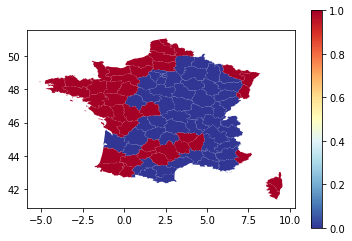

In [24]:
df = carte_metrop.merge(depmt_app_3, how = 'inner', left_index=True, right_index=True)
df.plot(column = 'Appartenance', cmap = 'RdYlBu_r', legend=True)#on crée des cartes

On vérifie la pertinence des groupes avec une ACP

In [10]:
acp=PCA(n_components=2)
proj=acp.fit_transform(depmt_groupe_3)
#Fit et réduit

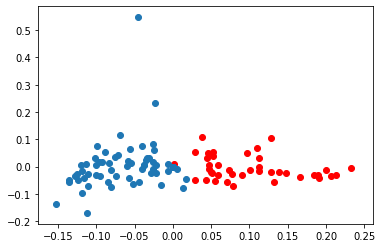

In [11]:
def nuagepoint(base) :
    proj0=[i[0] for i in proj]#on prend la projection sur l'axe des abcisses
    proj1=[i[1] for i in proj]#puis des ordonnées
    appartenance=np.array(base['Appartenance'])
    plt.scatter(proj0*appartenance, proj1*appartenance, color='red')#on projette en rouge les membres du cluster 1
    plt.scatter(proj0*(1-appartenance), proj1*(1-appartenance))#en bleu ceux du 0
nuagepoint(depmt_app_3)

Le clustering semble bien avoir séparé deux groupes différents, dont un qui semble expliquer une très grande part des différences et qui semble bien être l'axe droite-gauche.

On refait pour la Cinquième

In [39]:
mandat_dep_5=mandat_dep[mandat_dep['Régime politique']=='Cinquième République - Assemblée nationale']
(depmt_groupe_5, gros_groupe_5)=datagroupe(mandat_dep_5)

C:\Users\sylva\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


In [40]:
depmt_app_5=clustering(depmt_groupe_5.fillna(0))
centres=pd.DataFrame(kmeans.cluster_centers_, index=['0','1'],columns=gros_groupe_5)
pd.set_option('display.max_columns', None)
display(centres)

0.2714874718719894


,Union pour la majorité présidentielle,Union pour un mouvement populaire,La République en Marche,Socialiste,Union pour un Mouvement Populaire,Les Républicains,Nouvelle Gauche,Rassemblement pour la République,Mouvement Démocrate et apparentés,Non inscrit,Union des démocrates et indépendants,Communiste,Union pour la démocratie française,Nouveau Centre,Union pour la démocratie française et du centre,Gauche démocrate et républicaine,Socialiste,Front national,Communistes et républicains,Apparenté socialiste,République et liberté,Union du centre,Parti socialiste et radicaux de gauche,Union des démocrates pour la République,Union centriste,Républicains indépendants,Union des démocrates pour la République,Union démocratique pour la V° République,Réformateurs démocrates sociaux,Fédération de la gauche démocrate et socialiste,Progrès et démocratie moderne,Union pour la nouvelle République-UDT,Centre démocratique,Union pour la nouvelle République,Républicains populaires et centre démocratique,Unité de la République,Indépendants et paysans d'action sociale,Entente démocratique,Rassemblement démocratique
0,0.035881,0.035399,0.011395,0.140765,0.004274,0.004116,0.003419,0.085747,0.003512,0.014318,0.001023,0.077994,0.039882,0.001831,0.027593,0.004381,0.176561,0.00335,0.003219,0.009730,0.002758,0.001408,0.028542,0.045192,0.001453,0.012476,0.004183,0.013479,0.006045,0.045293,0.007823,0.019731,0.003108,0.064870,0.006078,-6.938894e-18,0.019246,0.008739,0.009342
1,0.039899,0.060985,0.011400,0.029688,0.004955,0.020635,0.001667,0.122035,0.003225,0.039163,0.004297,0.011067,0.078994,0.002769,0.026122,0.003478,0.059779,0.00132,0.000543,0.011778,0.003535,0.003273,0.004743,0.067008,0.007719,0.033146,0.001799,0.034665,0.003879,0.009501,0.011899,0.029310,0.011253,0.022446,0.009144,8.233822e-03,0.013816,0.003828,0.005345


Pour la Cinquième République, les résultats sont beaucoup moins encourageants. Il y a beaucoup plus de valeurs manquantes, ce qui enlève de l'intérêt au clustering : l'un des groupes a presque systématiquement un score plus grand que l'autre pour tous les partis. On va essayer d'en refaire un en se concentrant sur les premières législatures.

In [41]:
listeLegis=['Ire','IIe', 'IIIe', 'IVe', 'Ve', 'VIe', 'VIIe', 'VIIIe', 'IXe', 'Xe', 'XIe', 'XIIe', 'XIIIe', 'XIVe', 'XVe', 'XVIe']
listeLegislature=[' '+i+' législature ' for i in listeLegis]#on crée une liste des législatures dans le bon ordre
mandat_dep_5=mandat_dep[mandat_dep['Régime politique']=='Cinquième République - Assemblée nationale']
mandat_dep_prems=mandat_dep_5[mandat_dep_5['Législature']==listeLegislature[0]]
for legislature in listeLegislature[1:12] :
    mandat_dep_prems=pd.concat((mandat_dep_prems, mandat_dep_5[mandat_dep_5['Législature']==legislature]))
    
(depmt_groupe_5, gros_groupe_5)=datagroupe(mandat_dep_prems)

C:\Users\sylva\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in long_scalars
  


In [42]:
depmt_groupe_5=depmt_groupe_5[depmt_groupe_5.index.notna()]
depmt_groupe_5.index=[i[1:] for i in depmt_groupe_5.index]#on commence par enlever l'espace qui est au début du nom des départements
depmt_groupe_5metr=carte_metrop_5.merge(depmt_groupe_5, how = 'inner', left_index=True, right_index=True)#on enlève les députés hors france métropolitaine
depmt_groupe_5metr.drop(['code_insee', 'nuts3', 'wikipedia', 'geometry'], axis='columns', inplace=True)

In [43]:
clustering(depmt_groupe_5.fillna(0))
centres=pd.DataFrame(kmeans.cluster_centers_, index=['0','1'],columns=gros_groupe_5)
pd.set_option('display.max_columns', None)
display(centres)

0.5215993300867633


,Union pour la nouvelle République,Républicains populaires et centre démocratique,Unité de la République,Non inscrit,Indépendants et paysans d'action sociale,Entente démocratique,Socialiste,Communiste,Union pour la nouvelle République-UDT,Centre démocratique,Rassemblement démocratique,Républicains indépendants,Union démocratique pour la V° République,Progrès et démocratie moderne,Fédération de la gauche démocrate et socialiste,Union des démocrates pour la République,Parti socialiste et radicaux de gauche,Union centriste,Union des démocrates pour la République,Réformateurs démocrates sociaux,Rassemblement pour la République,Union pour la démocratie française,Socialiste,Apparenté socialiste,Front national,Union du centre,Union pour la démocratie française et du centre,République et liberté,Union pour un mouvement populaire,Union pour la majorité présidentielle,Communistes et républicains
0,0.024371,0.009299,0.005504,0.032825,0.015259,0.004970,0.079524,0.040139,0.029168,0.009544,0.007603,0.029948,3.109657e-02,0.012124,0.025267,0.06825,0.015156,0.006433,0.003067,5.445653e-03,0.129144,0.077988,0.118414,1.304529e-02,0.002511,0.003091,0.031702,0.003828,0.00306,4.616660e-02,0.001783
1,0.736042,0.000000,0.000000,0.000000,0.106689,0.055556,0.028469,0.043394,0.029851,0.000000,0.000000,0.000000,3.469447e-18,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-8.673617e-19,0.000000,0.000000,0.000000,1.734723e-18,0.000000,0.000000,0.000000,0.000000,0.00000,-6.938894e-18,0.000000


les résultats sont ici plus intéressants, avec un groupe plutôt plus à gauche que l'autre.
En fait non, c'est vraiment pas terrible.

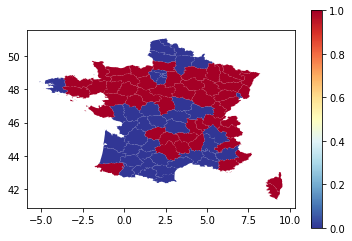

In [44]:
depmt_app_5=depmt_app_5[depmt_app_5.index.notna()]
depmt_app_5.index=[i[1:] for i in depmt_app_5.index]#on commence par enlever l'espace qui est au début du nom des départements
df = carte_metrop_5.merge(depmt_app_5, how = 'inner', left_index=True, right_index=True)
df.plot(column = 'Appartenance', cmap = 'RdYlBu_r', legend=True)#on crée la carte

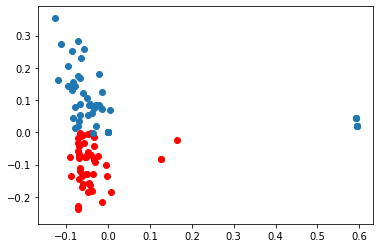

In [47]:
#depmt_groupe_5=depmt_groupe_5[depmt_groupe_5[' Non inscrit'].notna()]#on enlève les colonies sans données
proj=acp.fit_transform(depmt_groupe_5metr)
df.drop(['code_insee', 'nuts3', 'wikipedia', 'geometry'], axis='columns', inplace=True)
nuagepoint(df)

On a toujours le groupe parisien votant Union pour la Nouvelle République qui se détache, le reste est plus fluctuant

Pour l'Empire !

In [28]:
mandat_dep_emp2=mandat_dep[mandat_dep['Régime politique']=='Second Empire - Corps législatif']
(depmt_groupe_emp2, gros_groupe_emp2)=datagroupe(mandat_dep_emp2)
depmt_app_emp2=clustering(depmt_groupe_emp2.fillna(0))
centres=pd.DataFrame(kmeans.cluster_centers_, index=['0','1'],columns=gros_groupe_emp2)
pd.set_option('display.max_columns', None)
display(centres)

0.25063589377206724


,Centre droit,Opposition,Centre gauche,Gauche,Majorité dynastique,Tiers-parti,Majorité dynastique,Indépendant
0,0.110453,0.002311,0.017651,0.013935,0.809434,0.011585,0.001956,0.017547
1,0.105425,0.037294,0.059154,0.052971,0.525647,0.027448,0.036085,0.132290


Un groupe clairement pro-pouvoir, l'autre qui regroupe les mécontents (le centre droit faisant office d'entre-deux)

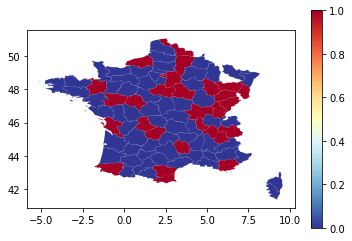

In [29]:
depmt_app_emp2.index=[i[1:] for i in depmt_app_emp2.index]#on commence par enlever l'espace qui est au début du nom des départements
df = carte_metrop.merge(depmt_app_emp2, how = 'inner', left_index=True, right_index=True)
df.plot(column = 'Appartenance', cmap = 'RdYlBu_r', legend=True)#on crée la carte

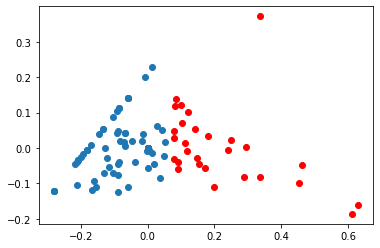

In [23]:
proj=acp.fit_transform(depmt_groupe_emp2)
nuagepoint(depmt_app_emp2)

On voit bien une séparation entre les deux groupes ici également.

In [24]:
acp.components_#comme il y a peu de grands partis, on peut regarder facilement les vecteurs propres de l'ACP.

array([[-0.01245552,  0.09971621,  0.12341285,  0.12435676, -0.89625841,
         0.08970181,  0.070648  ,  0.37800728],
       [ 0.83922823, -0.05123824, -0.18827126, -0.12595902, -0.20966967,
        -0.12329484,  0.22178893, -0.36524726]])

Le vote pour la majorité dynastique est largement l'élément contributif au plus grand vecteur propre : il est donc correct d'analyser la séparation opérée par le clustering comme une séparation entre départements pro-régime et ceux davantage liés à l'opposition.

Nouveau clustering, cette fois-ci sur les départaments

In [30]:
dpartement=ddpartement.set_index('Unnamed: 0')[0:4]

NameError: name 'ddpartement' is not defined

In [207]:
dpartement=dpartement.dropna(axis=1)
dpartement=dpartement.T[dpartement.T["nombre_mandat"]>40]

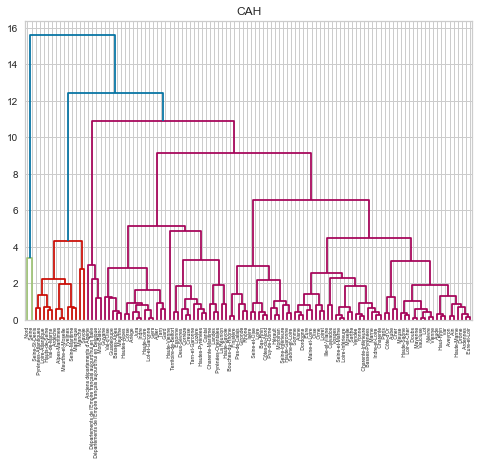

In [208]:
sc = StandardScaler()

centre_red=sc.fit_transform(dpartement)

Z = linkage(centre_red,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=dpartement.index)
plt.show()


In [209]:
centre_red=pd.DataFrame(centre_red, index=dpartement.index)

In [210]:
centre_red.head(2)

,0,1,2,3
Territoire-de-Belfort,-0.969324,-1.266135,-1.228411,0.303419
Ille-et-Vilaine,-0.819475,1.154130,0.725879,1.293571


In [211]:
carte_metrop = carte_departement.loc[0:95]#on enlève les départements d'outre-mer pour avoir une carte lisible
carte_metrop.set_index('nom', inplace=True)#on met le nom du département en index pour pouvoir joindre les bases

C:\ProgramData\Anaconda3\envs\environement\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:>, k=None, model=None)

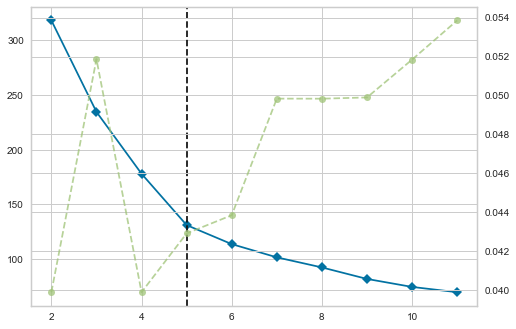

In [212]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(centre_red)   

In [213]:
kmeans = cluster.KMeans(n_clusters=5, max_iter=10000)#comme il y a beaucoup de variables et pas trop de données, on peut augmenter le nombre d'itérations.
centre_red_clust=clustering(centre_red.fillna(0))

3.6379149692712556


In [214]:
centre_red_clust.head(2)

,0,1,2,3,Appartenance
Territoire-de-Belfort,-0.969324,-1.266135,-1.228411,0.303419,0
Ille-et-Vilaine,-0.819475,1.154130,0.725879,1.293571,4


In [215]:
centre_red_clust.index=[i[1:] for i in centre_red.index]#on commence par enlever l'espace qui est au début du nom des départements
carte_metrop.head(1)

,code_insee,nuts3,wikipedia,geometry
nom,,,,
Ain,01,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ..."


In [217]:
carte_metrop.head(10)

,code_insee,nuts3,wikipedia,geometry
nom,,,,
Ain,01,FR711,b'fr:Ain (d\xe9partement)',"POLYGON ((5.25559 45.78459, 5.23987 45.77758, ..."
Aisne,02,FR221,b'fr:Aisne (d\xe9partement)',"POLYGON ((3.48175 48.86640, 3.48647 48.85768, ..."
Allier,03,FR721,b'fr:Allier (d\xe9partement)',"POLYGON ((2.38613 46.33196, 2.37909 46.32757, ..."
Basses-Alpes,04,FR821,fr:Alpes-de-Haute-Provence,"POLYGON ((6.66579 43.83120, 6.67673 43.83178, ..."
Hautes-Alpes,05,FR822,fr:Hautes-Alpes,"POLYGON ((6.24158 44.44686, 6.24783 44.44188, ..."
Alpes-Maritimes,06,FR823,fr:Alpes-Maritimes,"MULTIPOLYGON (((7.07221 43.51569, 7.07288 43.5..."
Ardèche,07,FR712,b'fr:Ard\xe8che (d\xe9partement)',"POLYGON ((4.66316 44.40747, 4.66340 44.39909, ..."
Ardennes,08,FR211,b'fr:Ardennes (d\xe9partement)',"POLYGON ((5.30837 49.56270, 5.31240 49.55928, ..."
Ariège,09,FR621,b'fr:Ari\xe8ge (d\xe9partement)',"POLYGON ((1.90727 42.76734, 1.91669 42.75562, ..."


In [218]:
df = carte_metrop.merge(centre_red_clust, how = 'inner', left_index=True, right_index=True)

<AxesSubplot:>

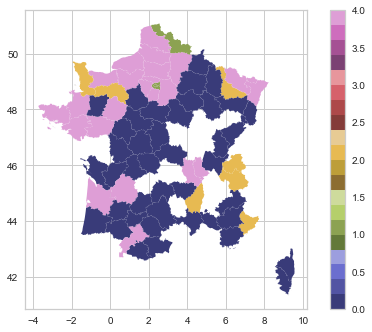

In [219]:
df.plot(column = 'Appartenance', legend=True, cmap='tab20b')#on crée la carte

In [220]:
dpartement.index=[i[1:] for i in dpartement.index]

In [221]:
analyse=dpartement.join(df["Appartenance"],how='inner')

In [222]:
analyse.groupby("Appartenance").median()

,age moyen des deputes,nombre_mandat,nombre député,nombre moyen de mandats par député
Appartenance,,,,
0,48.358941,274.0,128.0,2.212766
1,48.768821,1635.0,804.0,2.033582
2,52.434019,267.0,104.0,2.570000
4,49.248617,473.0,200.0,2.285141
